# Understanding Heart Disease Through Data

Heart disease is one of the leading causes of death worldwide.  
This project explores a heart disease dataset to understand which measurable health indicators are most strongly associated with the presence of heart disease.

Rather than building a predictive model, the goal of this analysis is to **tell a clear and interpretable story** using data visualizations that can be understood by a mixed audience, including non-technical and executive stakeholders.


## Dataset Overview

The dataset used in this analysis is the **Cleveland Heart Disease dataset** from the UCI Machine Learning Repository.

- **Observations:** 303 patients  
- **Features:** Demographic, clinical, and exercise-related measurements  
- **Target variable:**  
  - `1` = Presence of heart disease  
  - `0` = No heart disease  

The dataset is relatively clean and well-structured, making it suitable for exploratory data analysis and storytelling.


## Loading and Inspecting the Data

We begin by importing the necessary libraries and loading the dataset into a pandas DataFrame.  
An initial inspection helps verify the structure of the data and ensures there are no missing values that could distort the analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# optional: make plots look cleaner
plt.style.use("default")

# load dataset
df = pd.read_csv("heart.csv")

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [2]:
df.shape


(303, 14)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [5]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Initial Observations

- The dataset contains **303 records** with no missing values.
- Most variables are numeric and ready for analysis.
- The target variable is binary, allowing for clear comparison between patients with and without heart disease.

These characteristics make the dataset appropriate for visual exploration and comparison.


In [6]:
df['target'].value_counts()


target
0    164
1    139
Name: count, dtype: int64

## Question 1: How Common Is Heart Disease in This Dataset?

Before exploring individual risk factors, it is important to understand how heart disease is distributed across the dataset.

This visualization shows the number of patients with and without heart disease.


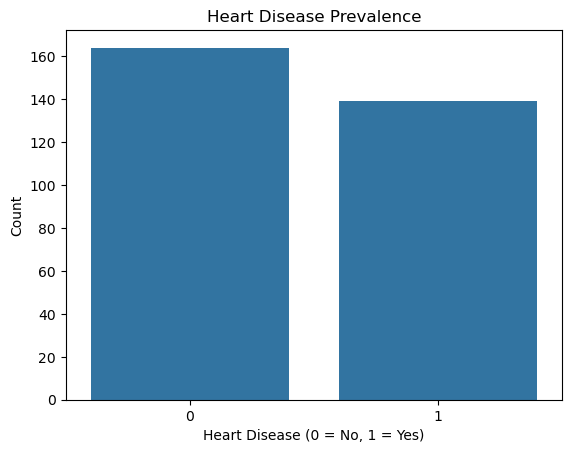

In [7]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Prevalence")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Insight**

The dataset is relatively balanced between patients with heart disease and those without.  
This balance allows for meaningful comparisons and reduces the risk of biased conclusions.


## Question 2: Does Age Relate to Heart Disease?

Age is commonly associated with heart disease risk.  
This visualization compares the age distribution of patients with and without heart disease.


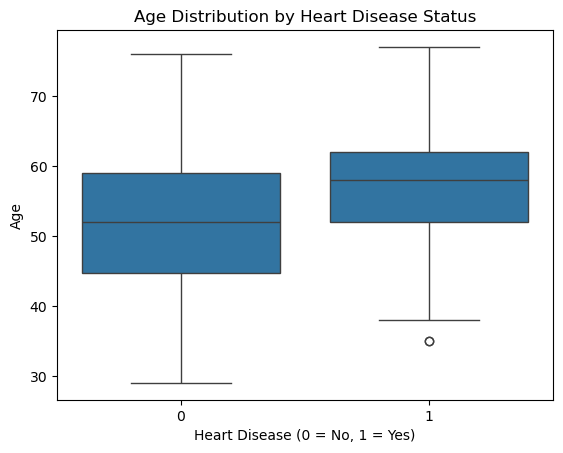

In [8]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


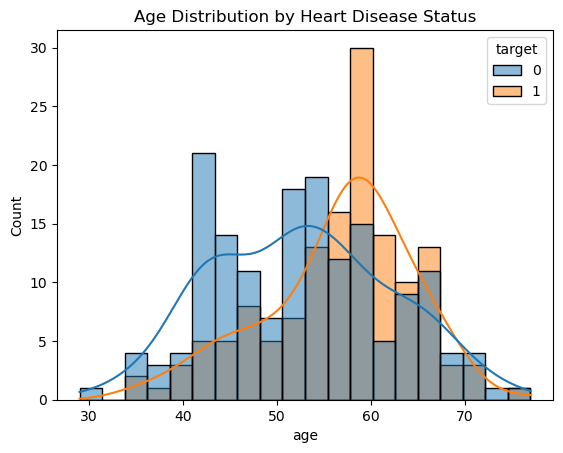

In [9]:
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.show()


**Insight**

Patients with heart disease tend to be older on average.  
However, there is significant overlap between the two groups, indicating that age alone does not determine heart disease risk.


## Question 3: Is Heart Disease More Common in One Gender?

This visualization compares heart disease prevalence between male and female patients.


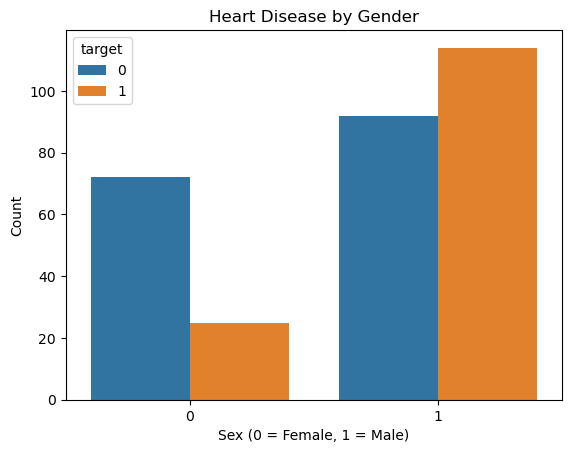

In [10]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


**Insight**

Male patients show a higher prevalence of heart disease compared to female patients.  
This suggests that gender may be an important demographic factor in assessing risk.


## Question 4: How Does Chest Pain Type Relate to Heart Disease?

Chest pain type is a categorical variable that describes how patients experience chest discomfort.  
This visualization compares chest pain categories against heart disease presence.


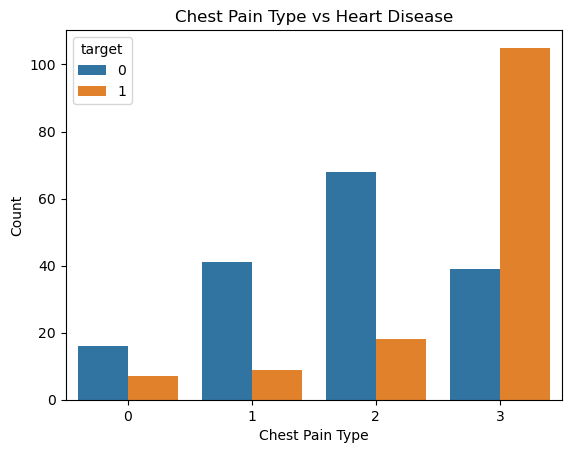

In [11]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


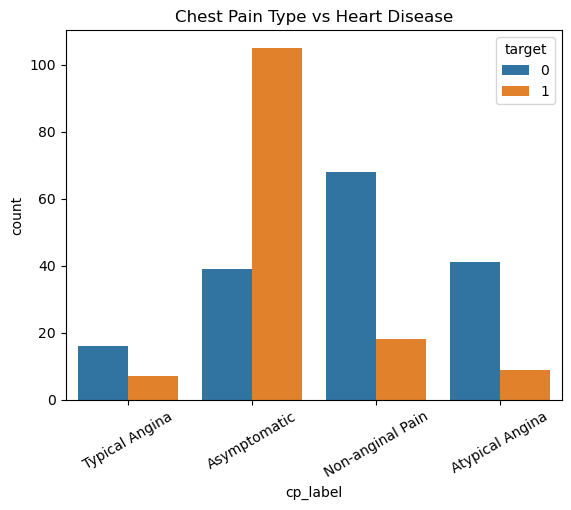

In [12]:
cp_labels = {
    0: "Typical Angina",
    1: "Atypical Angina",
    2: "Non-anginal Pain",
    3: "Asymptomatic"
}

df['cp_label'] = df['cp'].map(cp_labels)

sns.countplot(x='cp_label', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xticks(rotation=30)
plt.show()


**Insight**

Patients with asymptomatic or atypical chest pain show a significantly higher rate of heart disease.  
This suggests that some high-risk patients may not experience classic symptoms, increasing the risk of delayed diagnosis.


## Question 5: Do Cholesterol and Blood Pressure Predict Heart Disease?

Cholesterol and blood pressure are traditionally considered key indicators of heart disease risk.  
The following visualizations compare these metrics across patients with and without heart disease.


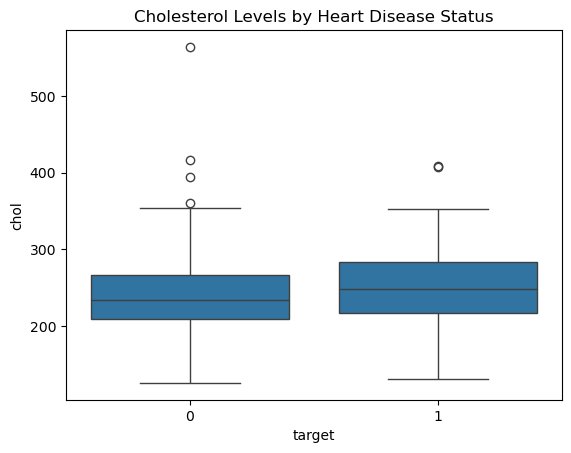

In [13]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol Levels by Heart Disease Status")
plt.show()


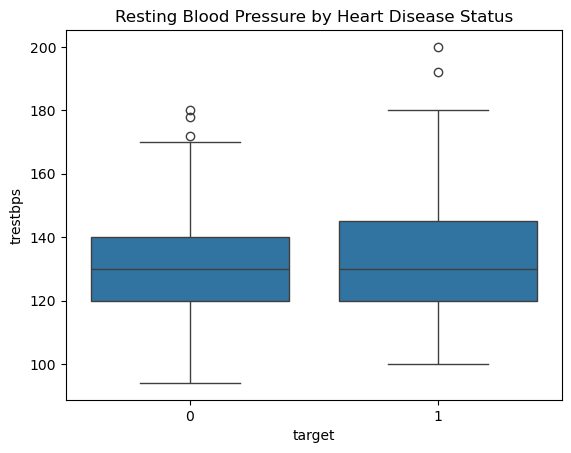

In [14]:
sns.boxplot(x='target', y='trestbps', data=df)
plt.title("Resting Blood Pressure by Heart Disease Status")
plt.show()


**Insight**

Both cholesterol levels and resting blood pressure show substantial overlap between groups.  
This suggests that, on their own, these measures are weaker predictors of heart disease than commonly assumed.


## Feature Relationships: Correlation Heatmap

The correlation heatmap summarizes how strongly different variables relate to each other and to heart disease.

Darker colors represent stronger relationships, while lighter colors indicate weaker relationships.


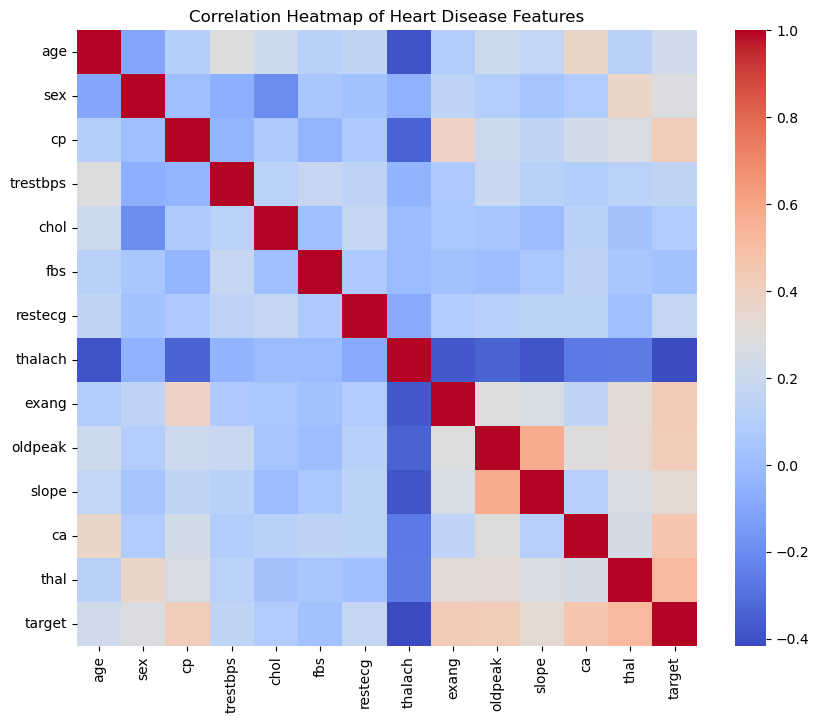

In [16]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()


**Insight**

The strongest relationships with heart disease are observed in symptom-related and exercise-related variables such as chest pain type, exercise-induced angina, and heart stress indicators.

Traditional measures like cholesterol and blood pressure show weaker correlations, reinforcing earlier findings.


**Hypothesis**

Chest pain type and exercise-related indicators are stronger predictors of heart disease than cholesterol or resting blood pressure.

Future analysis could explore whether combining these variables improves early detection of heart disease.


**_Final Conclusions_**

- Heart disease risk is influenced by multiple interacting factors.
- Age and gender contribute to risk but are not sufficient on their own.
- Symptom patterns and exercise responses are stronger indicators than traditional lab values.
- Relying on a single metric may lead to underdiagnosis.

**_Implication_**

Early screening strategies should focus on symptom patterns and stress-related indicators rather than isolated measurements.
